# Laboratorio 4 - Parte 2

### Redes Neuronales Artificiales: RNN y SOM

### 2018-II

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co


## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

#### Primer Integrante: Dany Francisco Hernandez
#### Segundo Integrante: Daniel Martínez Galeano

In [0]:
from __future__ import division
import numpy as np
import math
import matplotlib.pyplot as plt
#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")
%matplotlib inline

## Ejercicio 1

En este ejercicio vamos a utilizar dos bases de datos diferentes para entrenar dos mapas auto-organizables. En primer lugar usaremos la base de datos iris y posteriormente la base de datos de dígitos escritos.  Si bien en estas dos bases de datos las muestras cuentan con etiquetadas de salida, las vamos a usar para evaluar el agrupamiento que produce un SOM, es decir que no usaremos las etiquetas e intentaremos que el modelo descubra los grupos de muestras similares que hay en los datos. Tenga en cuenta el número de clases en cada una de las bases de datos para los análisis posteriores.

In [0]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data

#Definimos una lista de colores de acuerdo con las clases originales
colors = ["red"] * 50
colors.extend(["green"] * 50)
colors.extend(["blue"] * 50)

Para el trabajo usaremos el paquete somoclu (use la instrucción pip install sumoclu), los parámetros de la función los pueden consultar en : https://somoclu.readthedocs.io/en/stable/reference.html. 

Complete el siguiente código para entrenar un SOM con los datos almacenados en la variable Xn (Datos normalizados), use una cuadrícula de neuronas de 100 por 120 y un número de épocas igual a 100. Adicionalmente use las opciones maptype="toroid" y compactsupport=False, para una mejor visualización de los resultados.

In [0]:
!pip install somoclu

     |████████████████████████████████| 6.2MB 4.9MB/s 
  Created wheel for somoclu: filename=somoclu-1.7.5-cp27-cp27mu-linux_x86_64.whl size=419321 sha256=2287391f5ff07cc6f57e4a9b4c74265779ff7a625370eeb4de43762dbe572f54
  Stored in directory: /root/.cache/pip/wheels/85/3c/e5/5b1c535e93453367a8e3d35a377d3c668da00369b1a4302ad8
Successfully built somoclu


In [0]:
from numpy import random
import somoclu
from sklearn.preprocessing import StandardScaler

random.seed(19680801)
scaler = StandardScaler()
Xn = scaler.fit_transform(X);
#https://somoclu.readthedocs.io/en/stable/example.html

n_rows, n_columns = 100, 120
som = somoclu.Somoclu(n_columns, n_rows, maptype="toroid", compactsupport=False)
%time som.train(Xn)

CPU times: user 10.7 s, sys: 5.4 ms, total: 10.7 s
Wall time: 5.39 s


Una vez entrenado el modelo ejecute la siguiente celda, la cuál grafica la matriz U extraída del SOM:

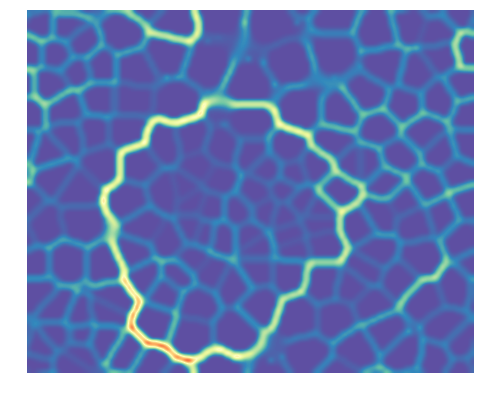

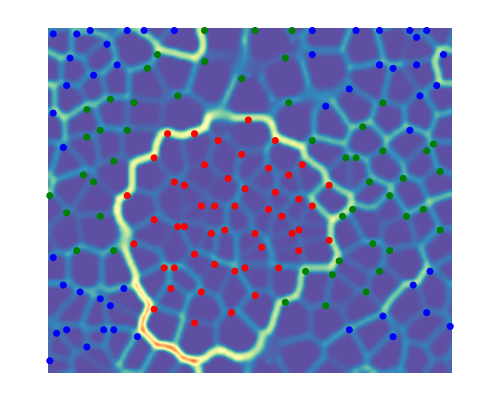

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

In [0]:
som.view_umatrix()
som.view_umatrix(bestmatches=True, bestmatchcolors=colors)

Responda:

1.1 ¿Qué es la matrix U (En inglés U-matrix) de un SOM?

Es una representación de un mapa autoorganizado donde la distancia euclidiana entre los vectores del libro de códigos de las neuronas vecinas se representa en una imagen en escala de grises. Esta imagen se utiliza para visualizar los datos en un espacio de alta dimensión utilizando una imagen 2D. En otras palabras es una visualización de la distancia entre cada nodo en el mapa y sus vecinos inmediatos.


1.2 ¿Cómo se pueden interpretar las gráficas obtenidas en el punto anterior? Describa detalladamente lo que observa e interprételo de acuerdo con la definición que dio en el punto 1.1

Como podemos observar en la primera grafica se parece a una red neuronal que contiene diferentes tramas de blancos o grises, los cuales interpretan el comportamiento de los datos utilizados, separandolos con fronteres y caracterizando los agrupamientos, asi como se muestra en la segunda grafica donde el rojo es el que tiene mejor agrupamiento o frontera.



Ejecute la siguiente instrucción:

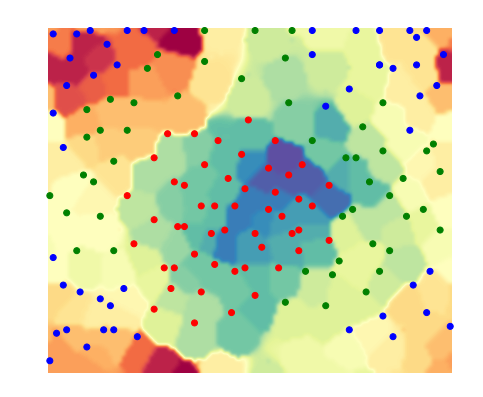

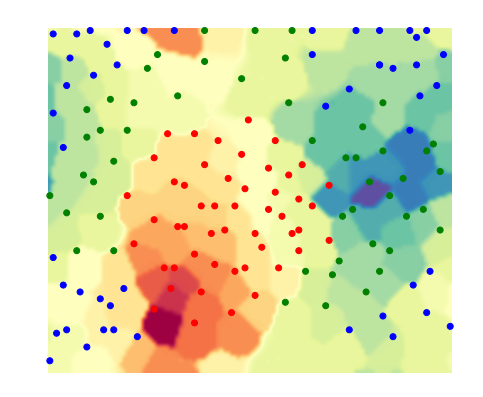

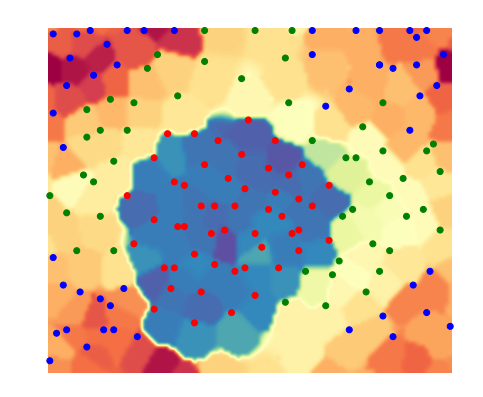

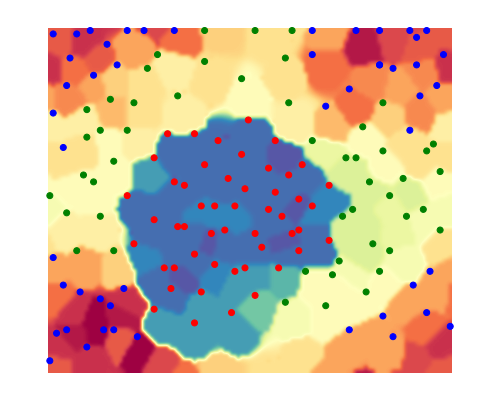

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

In [0]:
som.view_component_planes(bestmatches=True, bestmatchcolors=colors)

https://vahidmoosavi.com/2015/03/05/how-to-interpret-self-organizing-maps-a-list-might-be-better/
https://metodosdigitaisufg.wordpress.com/2018/02/24/analise-de-dados-utilizando-python/

Responda:

1.3 ¿Qué se está gráficando en las figuras?

Parámetro opcional para trazar las mejores unidades coincidentes, en otras palabras, los pesos de las variables.

1.4 ¿Qué utilidad tienen las gráficas anteriores?

Interpretar el agrupamiento de las variables segun los pesos, como se observa desde la primera hasta la ultima figura mostrada, ya que la ultima muestra cuales variables son las mejores para representar el agrupamiento ya que como se ve el cambio de color los agrupa segun sus caracteristicas, por ejemplo las rojas con el fondo azul y asi.

1.5 ¿De acuerdo con las gráficas anteriores cuáles variables en el problema están correlacionadas?

Vemos en la primera grafica que el verde y el rojo estan correlacionados, en la segunda el verde y azul estan correlacionados, en a tercera el verde y el azul aun estan mas correlacioandos, en la cuarta parece que ya estan separadas todas.

CPU times: user 10.9 s, sys: 100 ms, total: 11 s
Wall time: 5.56 s


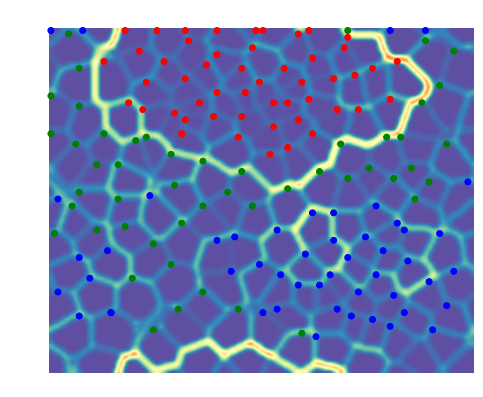

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

In [0]:
som = somoclu.Somoclu(n_columns, n_rows, maptype="toroid", compactsupport=False, initialization="pca")
%time som.train(Xn)
som.view_umatrix(bestmatches=True, bestmatchcolors=colors)

## Ejercicio 2

Repita el proceso anterior para los datos del problema de reconocimiento de dígitos escritos a mano. Ejecute la siguiente celda para cargar los datos

In [0]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
digits = load_digits(n_class=4)

#--------- preprocesamiento--------------------
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)

#---------- Datos a usar ----------------------
X = data
Y = digits.target

#Definimos una lista de colores de acuerdo con las clases en Y
color = []
for i in range(len(Y)):
    if Y[i] == 0:
        color.append('red')
    elif Y[i] == 1:
        color.append('blue')
    elif Y[i] == 2:
        color.append('green')
    elif Y[i] == 3:
        color.append('yellow')

Entrene un SOM a partir de los datos cargados en la celda anterior. En este caso utilice un SOM con una capa de neuronas de dimension 150 por 150.

In [0]:
random.seed(19680801)
scaler = StandardScaler()
Xn = scaler.fit_transform(X);

n_rows, n_columns = 150, 150
som = somoclu.Somoclu(n_columns, n_rows, maptype="toroid", compactsupport=False)
%time som.train(Xn)

CPU times: user 1min 12s, sys: 97.8 ms, total: 1min 12s
Wall time: 36.7 s


Una vez entrenado el SOM, ejecute la siguiente celda

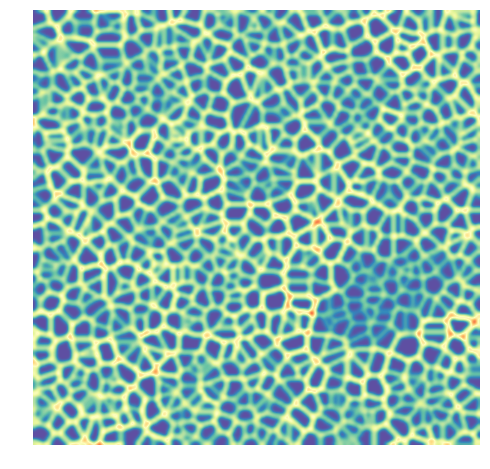

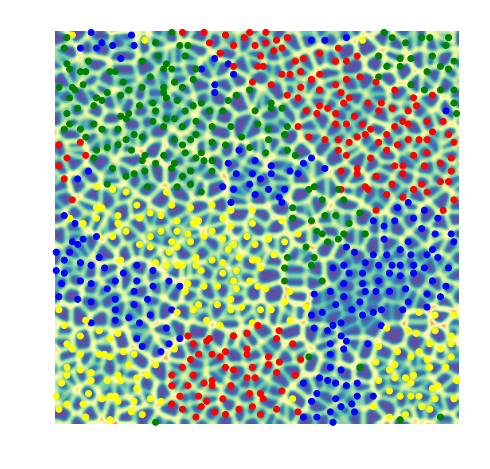

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

In [0]:
som.view_umatrix()
som.view_umatrix(bestmatches=True, bestmatchcolors=color)

Responda:

2.1 ¿Qué diferencia observa entre la matrix U en este caso vs el anterior?

Se puede observar que para este segundo grupo digits, la cantidad de neuronas o la red es muchisimo as grande que la primera, ademas de que las muestras estan dispersas por todos lados, no como en la primera que se veia la sepración mucho mas sencilla.

2.2 ¿Qué puede concluir a partir de la gráfica que incluye la ubicación de las neuronas ganadoras para cada muestra de entrada?

Primero, la separación de las fronteras no esta bien definida.
Segundo, las variables estan demasiado dispersas y estas parecen que tienen correlación con diferentes muestras de las clases.

## Ejercicio 3

En este ejercicio entrenaremos una Red Neuronal Recurrente para la predicción de una serie de tiempo. Este problema corresponde a una configuración many-to-many. En este caso usaremos una serie de tiempo que corresponde al número de pasajeros internacionales por mes, desde el año 1949 hasta el año 1960. La serie de tiempo puede ser consultada en: https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60#!ds=22u3&display=line 

/usr/local/lib/python2.7/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


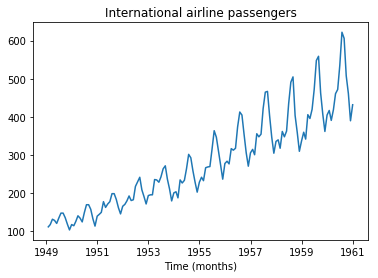

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('/content/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
#---- Tiempos para los datos originales---
date_begin = np.datetime64('1949-01')
date_end = np.datetime64('1961-01')
Time = pd.date_range(date_begin, date_end, freq='M')

plt.plot(Time,dataset)
plt.title('International airline passengers')
plt.xlabel('Time (months)')
plt.show()

El paquete que usaremos en este caso para el entrenamiento de redes neuronales recurrentes es neurolab (use la instrucción pip install neurolab), la documentación puede ser consultada en : https://pythonhosted.org/neurolab/.

In [0]:
!pip install neurolab

     |████████████████████████████████| 655kB 5.1MB/s 
  Created wheel for neurolab: filename=neurolab-0.3.5-cp27-none-any.whl size=22182 sha256=78e3fd1473038fb9bf2960b4e0a774ef77404e176be20ab4124d956ccd957103
  Stored in directory: /root/.cache/pip/wheels/c6/8f/37/32ab1cf4d601dc0bc49d7241012a4292db4b343bebff5b68e6
Successfully built neurolab


In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

#Mean Absolute Percentage Error para los problemas de regresión
def MAPE(Y_est,Y):
    N = np.size(Y)
    mape = np.sum(abs((Y_est.reshape(N,1) - Y.reshape(N,1))/Y.reshape(N,1)))/N
    return mape 

3.1 Complete el código siguiente y entrene una red neuronal recurrente de Elman, con una capa oculta y una capa de salida. Use función de activación tangente hiperbólica para la capa oculta y lineal para la capa de salida. Use un número de épocas igual a 1000, y un objetivo de error inferior a 0.00001. Inicialice los pesos de las capas aleatoriamente entre [-0.1, 0.1].

In [0]:
import neurolab as nl
import pylab as pl
from sklearn.preprocessing import MinMaxScaler
random.seed(19680801)


#neuronas=5
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
def invento(retardo, neuronas):

  train_size = int(len(dataset) * 0.7)
  test_size = len(dataset) - train_size
  train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

  # reshape into X=t-look_back+1:t and Y=t+1
  look_back = retardo # Retardos de tiempo por muestra
  trainX, trainY = create_dataset(train, look_back)
  testX, testY = create_dataset(test, look_back)

  #Esta variable se requiere para definir la red de acuerdo con la librería neurolab. Define el número de entradas y el rango de valores que toma cada entrada
  layers = []
  for i in range(look_back):
      layers.append([0, 1])

  # Crear la red e inicializar los pesos. 
  net = nl.net.newelm(layers, [neuronas, 1], [nl.trans.TanSig(), nl.trans.PureLin()])
  net.layers[0].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
  net.layers[1].initf= nl.init.InitRand([-0.1, 0.1], 'wb')
  net.init()

  # Entrenar la red con los datos de entrenamiento
  error = net.train(trainX, trainY.reshape(trainX.shape[0], 1), epochs=1000, goal=0.00001)

  # Evaluar la red con los datos de test
  output = net.sim(testX)
  # Calculo de error
  Error = MAPE(output,testY)
  pl.subplot(211)
  pl.plot(error)
  pl.xlabel('Salida Real')
  pl.ylabel('Prediccion de la red')

  pl.subplot(212)
  pl.plot(neuronas)
  pl.plot(output)
  pl.legend(['train target', 'net output'])
  pl.show()
  
  print('MAPE = ' + str(np.mean(Error)))
  
  return np.mean(Error)

Epoch: 100; Error: 0.0182885406564;
Epoch: 200; Error: 0.00249644119535;
Epoch: 300; Error: 0.00208203348142;
Epoch: 400; Error: 0.00193055676879;
Epoch: 500; Error: 0.00192259349799;
Epoch: 600; Error: 0.00191581444007;
Epoch: 700; Error: 0.00191957929192;
Epoch: 800; Error: 0.00189524352896;
Epoch: 900; Error: 0.00209049193931;
Epoch: 1000; Error: 0.00188012438472;
The maximum number of train epochs is reached


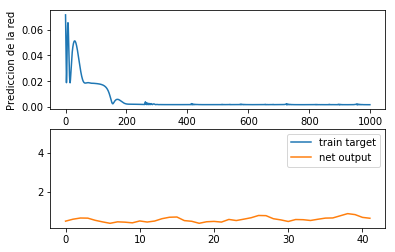

MAPE = 0.12473276507035648
0.12473276507035648


In [0]:
EX=invento(1,5)
print(EX)

3.1 Haga una gráfica de la salida real vs la mejor predicción hecha por la red. Recuerde incluir los tiempos apropiados en el eje x y usar el método plt.legend() para identificar cuál es la serie real y cual la predicción.

In [0]:
pl.subplot(211)
pl.plot(error)
pl.xlabel('Salida Real')
pl.ylabel('Prediccion de la red')

pl.subplot(212)
pl.plot([neuronas, 1].reshape())
pl.plot(output.reshape())
pl.legend(['train target', 'net output'])
pl.show()

NameError: ignored

3.2 Una vez compoletado el código realice los experimentos necesarios para llenar la siguiente tabla: 

In [0]:
import pandas as pd
#import qgrid
df_types = pd.DataFrame({
    'Retardos de tiempo por muestra' : pd.Series([1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4]),
    'Neuronas por capa' : pd.Series([5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30])})
df_types["MAPE"] = ""
df_types.set_index(['Retardos de tiempo por muestra','Neuronas por capa'], inplace=True)
#df_types.sort_index(inplace=True)
for i in df_types.index:
    print(i[0], i[1])
    EE=invento(i[0],i[1])
    df_types["MAPE"][i] = EE

#qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
#qgrid_widget

(1, 5)
Epoch: 100; Error: 0.0182885406564;
Epoch: 200; Error: 0.00249644119535;
Epoch: 300; Error: 0.00208203348142;
Epoch: 400; Error: 0.00193055676879;
Epoch: 500; Error: 0.00192259349799;
Epoch: 600; Error: 0.00191581444007;
Epoch: 700; Error: 0.00191957929192;
Epoch: 800; Error: 0.00189524352896;
Epoch: 900; Error: 0.00209049193931;
Epoch: 1000; Error: 0.00188012438472;
The maximum number of train epochs is reached
MAPE = 0.12473276507035648
(1, 10)
Epoch: 100; Error: 0.0191298507487;
Epoch: 200; Error: 0.00220346953109;
Epoch: 300; Error: 0.00194781607999;
Epoch: 400; Error: 0.00193185209688;
Epoch: 500; Error: 0.00208297046597;
Epoch: 600; Error: 0.00193109750264;
Epoch: 700; Error: 0.00190933674238;
Epoch: 800; Error: 0.00194282562752;
Epoch: 900; Error: 0.00190008026058;
Epoch: 1000; Error: 0.00191590180813;
The maximum number of train epochs is reached
MAPE = 0.12688949341245825
(1, 15)
Epoch: 100; Error: 0.0178662141531;
Epoch: 200; Error: 0.00233947464728;
Epoch: 300; Error:

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.
#NO FUNCIONA QGRID

In [0]:
df_types

MAPE
Retardos de tiempo por muestra Neuronas por capa          
1                              5                  0.124733
                               10                 0.126889
                               15                  0.12554
                               20                 0.123589
                               25                 0.126006
                               30                 0.125571
2                              5                  0.121106
                               10                 0.128252
                               15                 0.118291
                               20                 0.119602
                               25                  0.11772
                               30                 0.115747
3                              5                   0.12466
                               10                 0.122964
                               15                 0.117419
                               20                 0.116977
                               25                 0.115088
                               30                 0.119965
4                              5                  0.121975
                               10                 0.132312
                               15                 0.119528
                               20                 0.121184
                               25                 0.123147
                               30                 0.122198

In [0]:
#qgrid_widget.get_changed_df()

MAPE
Retardos de tiempo por muestra Neuronas por capa             
1                              5                  0.124732765
                               10                            
                               15                            
                               20                            
                               25                            
                               30                            
2                              5                             
                               10                            
                               15                            
                               20                            
                               25                            
                               30                            
3                              5                             
                               10                            
                               15                            
                               20                            
                               25                            
                               30                            
4                              5                             
                               10                            
                               15                            
                               20                            
                               25                            
                               30

Responda:

3.3 ¿Cuál fue la mejor configuración encontrada?

Retardo de tiempo 3, 25 neuronas por capa, MAPE	0.115088

3.4 ¿Porqué seguir aumentando los tiempos de retardo no implica siempre una mejora en la predicción del modelo?

## *Ejercicio 4

Este ejercicio es opcional. Use una red neuronal tipo MLP para reolver el mismo problema de predicción del número de pasajeros y compare el resultado con el obtenido usando la red recurrente.